In [1]:
from tournament import tournament
from reporting import Reporting
import importlib
from collections import namedtuple
from game_agent_comp import CustomPlayerComp
from value_functions import improved_score_fast_x2,improved_score_fast,\
    improved_score_fast_x3, partition_score_x2
from sample_players import null_score
from policy import SimplePolicy
#importlib.reload(reporting)
Agent = namedtuple("Agent", ["player", "name"])

#r = Reporting()
#r.report = []

CUSTOM_ARGS = {"method": 'alphabeta', 'iterative': True}

my_part_x2 = Agent(CustomPlayerComp(score_fn=partition_score_x2, **CUSTOM_ARGS),
                   "Partitioning with two steps")
my_x3 = Agent(CustomPlayerComp(score_fn=improved_score_fast_x3, **CUSTOM_ARGS),
      "improved, three steps exact")
my_x1 = Agent(CustomPlayerComp(score_fn=improved_score_fast, **CUSTOM_ARGS),
      "Faster improved")                        

my_x2 = Agent(CustomPlayerComp(score_fn=improved_score_fast_x2,**CUSTOM_ARGS), 
                  "improved, two steps exact, with reporting")

my_null = Agent(CustomPlayerComp(score_fn=null_score,method = 'minimax', iterative = True),
                       "Null score minimax ID")

policy_5 = SimplePolicy(5,  improved_score_fast_x2 )
policy_3 = SimplePolicy(3,  improved_score_fast_x2 )

my_policy_x2_5 = Agent(CustomPlayerComp(score_fn=improved_score_fast_x2,
                                        policy = policy_5, **CUSTOM_ARGS), 
                  "simple policy, max 3 moves")

my_policy_x2_3 = Agent(CustomPlayerComp(score_fn=improved_score_fast_x2,
                                        policy = policy_3, **CUSTOM_ARGS), 
                  "simple policy, max 5 moves")

#test_agents = [my_policy_x2]#my_null,my_x1, my_x2 , my_x3, my_part_x2]

test_agents = [my_policy_x2_3, my_policy_x2_5, my_x1, my_x2 , my_x3, my_part_x2]

tournament(num_matches = 10, test_agents = test_agents)

49
49
49
49
49
49
49
49
49
49
49
49
49
49

This script evaluates the performance of the custom heuristic function by
comparing the strength of an agent using iterative deepening (ID) search with
alpha-beta pruning against the strength rating of agents using other heuristic
functions.  The `ID_Improved` agent provides a baseline by measuring the
performance of a basic agent using Iterative Deepening and the "improved"
heuristic (from lecture) on your hardware.  The `Student` agent then measures
the performance of Iterative Deepening and the custom heuristic against the
same opponents.


*************************
Evaluating: simple policy, max 5 moves
*************************

Playing Matches:
----------
  Match 1: simple policy, max 5 moves vs   Random    	Result: 38 to 2
  Match 2: simple policy, max 5 moves vs   MM_Null   	Result: 38 to 2
  Match 3: simple policy, max 5 moves vs   MM_Open   	Result: 26 to 14
  Match 4: simple policy, max 5 moves vs MM_Improved 	Result: 30 to 10
  Mat

C:\Users\Egor\Dropbox\GitHub\aind\aind-isolation\tournament.py:106: UserWarning: One or more agents lost a match this round due to timeout. The get_move() function must return before time_left() reaches 0 ms. You will need to leave some time for the function to return, and may need to increase this margin to avoid timeouts during  tournament play.
  warnings.warn(TIMEOUT_WARNING)


	Result: 38 to 2
  Match 2: Faster improved vs   MM_Null   	Result: 37 to 3
  Match 3: Faster improved vs   MM_Open   	Result: 31 to 9
  Match 4: Faster improved vs MM_Improved 	Result: 27 to 13
  Match 5: Faster improved vs   AB_Null   	Result: 35 to 5
  Match 6: Faster improved vs   AB_Open   	Result: 30 to 10
  Match 7: Faster improved vs AB_Improved 	Result: 23 to 17
  Match 8: Faster improved vs ID_Improved 	Result: 20 to 20


Results:
----------
Faster improved     75.31%

*************************
Evaluating: improved, two steps exact, with reporting
*************************

Playing Matches:
----------
  Match 1: improved, two steps exact, with reporting vs   Random    	Result: 36 to 4
  Match 2: improved, two steps exact, with reporting vs   MM_Null   	Result: 33 to 7
  Match 3: improved, two steps exact, with reporting vs   MM_Open   	Result: 29 to 11
  Match 4: improved, two steps exact, with reporting vs MM_Improved 	Result: 31 to 9
  Match 5: improved, two steps exact, wi

In [ ]:
# process the moves statistics
test_agents = [my_null,my_x1, my_x2, my_x3, my_part_x2,my_policy_x2_3,my_policy_x2_5]

r = Reporting()

depths = get_depths(r.report, test_agents, lambda x: (x['depth'],x['score']))
print(depths)

In [18]:
import pickle
depths = {}

try:
    with open('result.pickle', 'rb') as handle:
        old_depths = pickle.load(handle)
except:
    old_depths={}

#print(old_depths)
for d in old_depths:
    for p, v in d.items():
        if p not in depths:
            depths[p]=v
        else:
            depths[p] = depths[p]+v
    
#with open('result.pickle', 'wb') as handle:
#    pickle.dump(depths, handle)
print(depths)

{'Partitioning with two steps': [[{'depth': 7, 'score': -25.0, 'winner': True, 'game': -1717143962388424545}, {'depth': 6, 'score': -23.0, 'winner': True, 'game': 6482540295006649035}, {'depth': 6, 'score': -20.0, 'winner': True, 'game': -8423482448987139433}, {'depth': 6, 'score': -14.0, 'winner': True, 'game': 8089074433807302385}, {'depth': 6, 'score': -11.0, 'winner': True, 'game': 3929092890436354232}, {'depth': 7, 'score': -12.0, 'winner': True, 'game': 2548788241491737069}, {'depth': 1, 'score': inf, 'winner': True, 'game': 1595050778727414315}], [{'depth': 6, 'score': -22.0, 'winner': True, 'game': -2469817152197165261}, {'depth': 6, 'score': -18.0, 'winner': True, 'game': 7654596058162115217}, {'depth': 6, 'score': -21.0, 'winner': True, 'game': -5497316045025681615}, {'depth': 6, 'score': -17.0, 'winner': True, 'game': -4816427042596199341}, {'depth': 6, 'score': -17.0, 'winner': True, 'game': 596818120772549382}, {'depth': 8, 'score': -5.0, 'winner': True, 'game': -890437574

In [19]:
def transpose_list_of_lists(lol):
    transp = []

    for game in lol:
        for m, move_depth in enumerate(game):
            if len(transp) <= m:
                transp.append([])
            transp[m].append(move_depth)
    return transp



In [23]:
from statistics import mean, stdev, median
import numpy as np

def get_mean_std(lol):
    result = {'mu':[], 'std':[],'median':[], 'strict_win':[], 'strict_loss':[]}
    
    for move in lol:
        if len(move) > 2:
            result['mu'].append(mean([m['depth'] for m in move]))
            result['std'].append(stdev([m['depth'] for m in move]))
            result['median'].append(median([m['depth'] for m in move]))
            result['strict_win'].append(\
                len([ m['score'] for m in move if m['score'] == float('inf')]) / len(move))
            result['strict_loss'].append(\
                len([ m['score'] for m in move if m['score'] == float('-inf')]) / len(move))
            
            
    result['mu'] = np.array(result['mu'] )
    result['std'] = np.array(result['std'])
    result['median'] = np.array(result['median'])
    result['strict_win'] = np.array(result['strict_win'])
    result['strict_loss'] = np.array(result['strict_loss'])
    return result

player_stats = {}
for p, d in depths.items():
    player_stats[p] = get_mean_std(transpose_list_of_lists(d))


In [24]:
player_stats


{'Partitioning with two steps': {'median': array([  6.,   6.,   6.,   6.,   7.,   7.,   8.,   9.,   9.,  11.,  10.,
           9.,   7.,   5.,   3.,   1.]),
  'mu': array([  5.96875   ,   5.8125    ,   6.0625    ,   6.28125   ,
           6.59375   ,   7.        ,   7.4375    ,   8.67741935,
           9.58064516,  10.16129032,   9.58064516,   8.48148148,
           6.73076923,   4.77272727,   3.5       ,   1.8       ]),
  'std': array([ 0.73985068,  0.82060167,  1.0140147 ,  0.81257754,  1.04292934,
          1.16397539,  1.77686749,  1.72021504,  2.64290489,  4.115797  ,
          4.39525649,  3.35548197,  3.3293566 ,  2.72434908,  2.394438  ,
          1.93218357]),
  'strict_loss': array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ,  0.16129032,
          0.22580645,  0.2962963 ,  0.26923077,  0.22727273,  0.125     ,  0.        ]),
  'strict_win': array([ 0.        ,  0.        ,  0.        ,  0.     

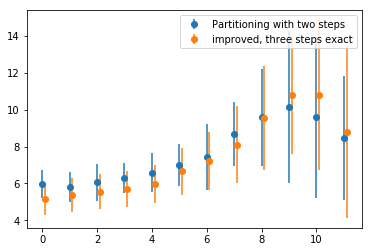

In [25]:
#import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure()
ax = plt.axes()
#ax.set_yscale("log")
lines = []
legend = []
n=0
lastpt = 12
for p, stats in player_stats.items():
    lines.append(\
        plt.errorbar(np.array(range(lastpt))+n,stats['mu'][0:lastpt], 
                     yerr=stats['std'][0:lastpt], fmt='o'))
    legend.append(p)
    n+= 0.1

plt.legend(lines,legend)
plt.show()

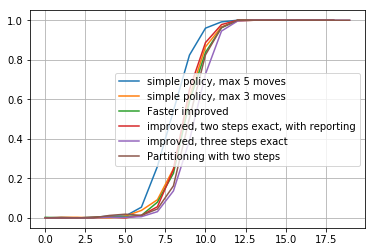

In [6]:
plt.figure()
ax = plt.axes()
#ax.set_yscale("log")
lines = []
legend =[]
for p, stats in player_stats.items():
    lines.append(\
        plt.plot(range(len(stats['mu'])),stats['strict_w_l']))
    legend.append(p)
plt.legend(legend)
plt.grid()
plt.show()